<IMG SRC="https://ucalgary.ca/themes/ucalgary/ucws_theme/images/UCalgary.svg" WIDTH=250 ALIGN="right">    </IMG>
## Plotting $\dot{V}O_2$ continued...

#### Developed by Dr. John Holash at the University of Calgary

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demo-knes381/subject_1321.xlsx
/kaggle/input/demo-knes381/subject_1432.xlsx
/kaggle/input/demo-knes381/subject_1321.csv
/kaggle/input/demo-knes381/subject_1232.csv
/kaggle/input/demo-knes381/VO2_CSV.csv
/kaggle/input/demo-knes381/subject_1232.xlsx
/kaggle/input/demo-knes381/subject_1432.csv
/kaggle/input/demo-knes381/subject_1523.csv
/kaggle/input/demo-knes381/VO2_excel.xlsx
/kaggle/input/demo-knes381/subject_1523.xlsx


In [26]:
df = pd.read_csv('../input/demo-knes381/subject_1432.csv')
df.head(60)

,TIME,VO2,VO2/kg,METS,VCO2,VE,RER,RR,Vt,FEO2,FECO2,HR,VE/,VE/.1,PetCO2
0,NaN,STPD,STPD,NaN,STPD,BTPS,NaN,NaN,BTPS,NaN,NaN,NaN,VO2,VCO2,NaN
1,min,L/min,ml/kg/m,NaN,L/min,L/min,NaN,BPM,L,%,%,bpm,BT/ST,BT/ST,mmHg
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.534000039,1.031499386,13.84562969,3.955894,0.921027899,32.77013397,0.892902,24.34456825,1.346096277,16.59932327,3.995723009,82,31.76941681,35.57995987,27.01317215
4,1.031666636,1.078813553,14.48071861,4.137348,0.941370487,32.80964661,0.872598,22.10314941,1.484387875,16.42579842,4.078265667,36,30.4127121,34.85306549,27.12163162
5,1.521333337,0.999064684,13.41026402,3.831504,0.884314001,29.55063248,0.885142,18.37985039,1.607773304,16.28624344,4.251848698,56,29.57829666,33.41644669,28.35643578
6,2.003166676,1.156774282,15.52717113,4.436335,0.995852172,32.44647217,0.860887,18.67865944,1.737087846,16.05854034,4.359823227,27,28.04909515,32.58161545,29.16718483
7,2.507666588,1.121407986,15.0524559,4.300702,0.962487578,31.22615242,0.858285,15.8572855,1.969199061,16.02567291,4.37826252,27,27.84548759,32.44317627,29.20425415
8,3.000500202,1.127919674,15.13986111,4.325675,0.973358154,32.01932144,0.862968,18.26175117,1.75335443,16.11453247,4.31856966,84,28.38794518,32.89572525,28.69371033
9,3.523500443,1.081965089,14.5230217,4.149435,0.917149305,30.95614624,0.847670,22.94455147,1.349171996,16.16783142,4.209988594,84,28.61104012,33.75257111,28.03577995


In [27]:
df = pd.read_csv('../input/demo-knes381/subject_1232.csv', header=[0], skiprows=[1,2,3])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME         54 non-null     float64
 1   VO2          54 non-null     float64
 2   VO2/kg       54 non-null     float64
 3   METS         54 non-null     float64
 4   VCO2         54 non-null     float64
 5   VE           54 non-null     float64
 6   RER          54 non-null     float64
 7   RR           54 non-null     float64
 8   Vt           54 non-null     float64
 9   FEO2         54 non-null     float64
 10  FECO2        54 non-null     float64
 11  HR           54 non-null     float64
 12  VE/VO2       54 non-null     float64
 13  VE/VCO2      54 non-null     float64
 14  PetCO2       54 non-null     float64
 15  PO           54 non-null     int64  
 16  Unnamed: 16  9 non-null      float64
dtypes: float64(16), int64(1)
memory usage: 7.3 KB


### Rename some of the columns so they make sense
you can rename them with the value TIME -> Time(min) but don't leave spaces if you want to auto-complete names...

In [29]:
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME         54 non-null     float64
 1   VO2          54 non-null     float64
 2   VO2/kg       54 non-null     float64
 3   METS         54 non-null     float64
 4   VCO2         54 non-null     float64
 5   VE           54 non-null     float64
 6   RER          54 non-null     float64
 7   RR           54 non-null     float64
 8   Vt           54 non-null     float64
 9   FEO2         54 non-null     float64
 10  FECO2        54 non-null     float64
 11  HR           54 non-null     float64
 12  VE/VO2       54 non-null     float64
 13  VE/VCO2      54 non-null     float64
 14  PetCO2       54 non-null     float64
 15  PO           54 non-null     int64  
 16  Unnamed: 16  9 non-null      float64
dtypes: float64(16), int64(1)
memory usage: 7.3 KB


In [31]:
df.head()

,TIME,VO2,VO2/kg,METS,VCO2,VE,RER,RR,Vt,FEO2,FECO2,HR,VE/VO2,VE/VCO2,PetCO2,PO,Unnamed: 16
0,0.514000,1.459290,16.582838,4.737954,1.112682,41.919689,0.762482,21.400778,1.958793,16.275774,3.774875,87.0,28.726089,37.674450,25.064108,50,NaN
1,1.022167,1.504223,17.093439,4.883840,1.160519,42.434860,0.771507,21.646441,1.960362,16.181290,3.888129,89.0,28.210491,36.565426,26.064850,50,NaN
2,1.519834,1.555103,17.671625,5.049036,1.147277,41.991577,0.737750,22.103148,1.899801,16.005651,3.884471,84.0,27.002441,36.601089,25.945581,50,NaN
3,2.012334,1.745615,19.836536,5.667582,1.338574,46.513016,0.766821,16.243654,2.863458,15.907585,4.089391,92.0,26.645630,34.748173,27.309790,50,NaN
4,2.532000,1.667379,18.947485,5.413567,1.274816,43.739609,0.764563,23.091724,1.894168,15.831031,4.141047,91.5,26.232559,34.310535,27.466810,50,2.3


In [32]:
import matplotlib.pyplot as plt

### Create our big plot...
1st define our variables x,y,& y1

In [33]:
# simplify our terms to reduce future typing...
x = df['TIME']
y = df['VO2']
y1 = df['VE']

#### Find the position where max occurs, on each axes

In [34]:
#Find VO2 max value 
# added print function in order to read it
print(f' ymax = {max(y)}')

# find the x position of the ymax value or where ymax occurs on the x axis
print(f' xmax = {x[y.argmax()]}')

 ymax = 4.184775
 xmax = 26.500189


#### Now we can discover what these values are

In [35]:
# I didn't read ahead so I input this into previous cell
print(ymax)
print(xmax)

5.018108725449999
29.00016212


#### Create the frame and the axis that we will plot in

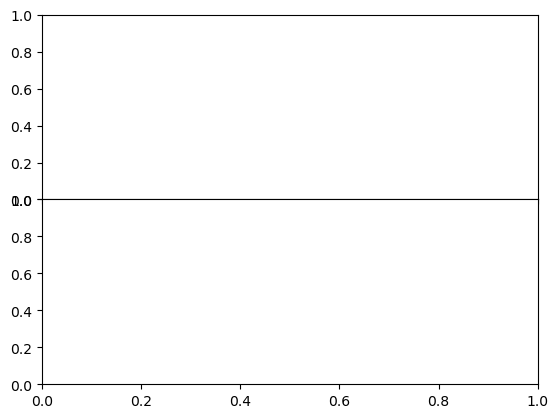

In [36]:
# break up the figure and axis definitions of a plot 
# so it is easier to assign values

fig, ax = plt.subplots(2, 1, sharex=True)

# create 2 subplots share x axis, in the next line we will remove 
# spaces between the horizontal axis, play with this value to see what happens the value can be 0.01 for example

fig.subplots_adjust(hspace=0.0)

#### Now that we have that axis value specified, annotate the position and marker for VO2 max

In [37]:
ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ 1),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

Text(29.50016212, 6.018108725449999, '$\\dot VO_2max$ =(5.02) L/min')

#### For the first plot ax[0] we create the lable and make it red
Then we get rid of the right and top plot frame
We set the y axis lab as "L/min" and tell it to print a legend

In [38]:
ax[0].plot(x, y,  label=('$\dot VO_2$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
#note all these set features could be added in one line but reading it would be difficult
#ax.set(title = ('$\dot VO_2$'), label=('$\dot VO_2$ L/min'))  
ax[0].set(ylabel=('L/min'))
ax[0].legend()

#### Same thing for the second plot *note* we don't see the plot because we have not ploted the plot

In [39]:
# Second plot of values down from the top
ax[1].plot(x, y1, label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('L/min'))
ax[1].legend()

#### We can now create a file with our first plot! We will save the plot first for reasons discussed

In [40]:
fig.savefig("VO2-VE-3.png", dpi=300, bbox_inches = "tight")

#### As this is an interactive space we need to put all the code together for it to plot out interactively...

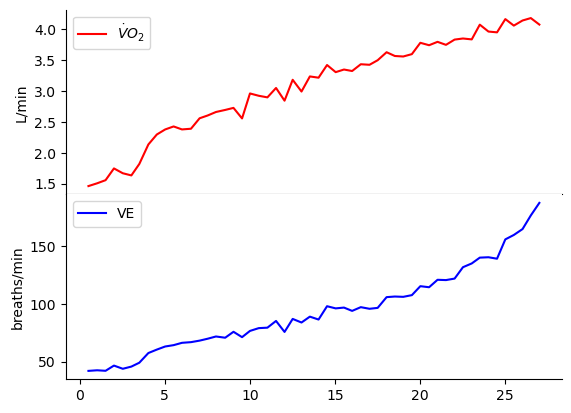

In [41]:
# break up the figure and axis definitions of a plot 
# so it is easier to assign values
fig, ax = plt.subplots(2, 1, sharex=True)  # Height increased from default
# spaces between the horizontal axis, play with this value?
fig.subplots_adjust(hspace=0)


ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ 1),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

ax[0].plot(x, y,  label=('$\dot VO_2$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
#note all these set features could be added in one line but reading it would be difficult
#ax.set(title = ('$\dot VO_2$'), label=('$\dot VO_2$ L/min'))  
ax[0].set(ylabel=('L/min'))
ax[0].legend()

# Second plot of values down from the top
ax[1].plot(x, y1, label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].legend()

#ax[0].set_ylim(min(y) - 1, max(y) + 1)  # Adjust as needed for your data
#ax[1].set_ylim(min(y1) - 1, max(y1) + 1)  # Adjust as needed

# save the figure before we show it... or it will be blank
fig.savefig("VO2-VE-3.png", dpi=300, bbox_inches = "tight")
fig.show()

### We can put this all together now in one code block that does everything...

We have built up each part seperatly in the code above to make sure that all parts of our code should and do work.  Now that we know everything works we can take the next step of putting it together in one code block so we don't run into coherence problems (running things out of order).  We will run everything in one block now, this is a self contained python file and you could turn it into a .py file and run it from the command line and if your path to the datafile was accurate it would run and save the image file.

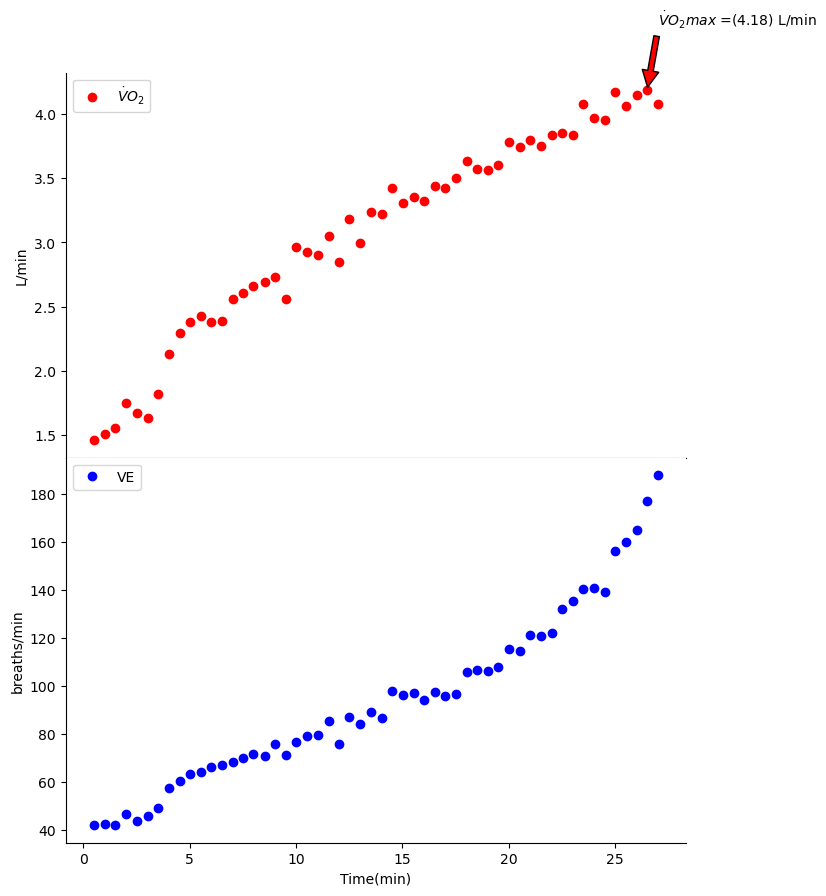

In [42]:
### Now all together in one code block that could run independently...
# lets take care of importing everything we need at once

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Lets read in our file now
df = pd.read_csv('../input/demo-knes381/subject_1232.csv', header=[0], skiprows=[1,2,3])

# please note that while this is an output file from the parvo-metabolics cart we have
# I have edited this data set and simplied the header file on it

# rename our column headers
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

# simplify our terms to reduce future typing... 
# it is easier to write plot x, y than plot df['Time'], df['VO2']
x = df['TIME']
y = df['VO2']
y1 = df['VE']

#Find VO2 max value 
ymax = max(y)

# find the x position of the ymax value or where ymax occurs on the x axis
xmax = x[y.argmax()]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 10)) # Note I increased the figure size here.

# this line seperates the two plots...
fig.subplots_adjust(hspace=0)

# annotate the position of V02 max before plotting the value, we could do this later but why.

ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ .5),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

ax[0].plot(x, y, 'o', label=('$\dot VO_2$'), c='r' )
# in the line of code below I hide the top and right black bars serrounding the plot for APA format.
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set(ylabel=('L/min'))
ax[0].legend()
#note all these set features could be added in one line but reading it would be difficult

# Second plot of values down from the top
ax[1].plot(x, y1, 'o', label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].set(xlabel=('Time(min)'))
ax[1].legend()

# save the figure before we show it... or it will be blank
fig.savefig("VO2-VE-4.png", dpi=300, bbox_inches = "tight")
fig.show()

### Please note that if you change the file path of the datafile in the code block above you create an completely new graph for your new data, all by changing just one line of code...
Also I have changed the marker form a line to dots, can you see somthing about the data that was hidden before when it was plotted in lines?

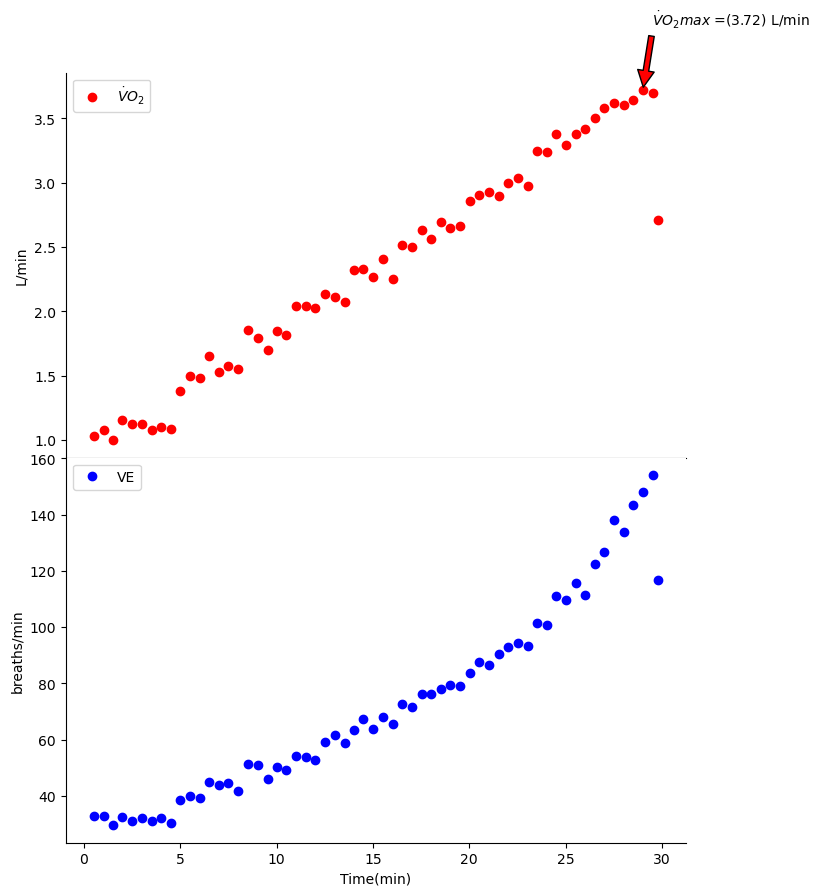

In [43]:
# impport

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Lets read in our file now
df = pd.read_csv('../input/demo-knes381/subject_1432.csv', header=[0], skiprows=[1,2,3])

# rename our column headers
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

# labelling our relavant values to be easier to type
x = df['TIME']
y = df['VO2']
y1 = df['VE']

#Find VO2 max value 
ymax = max(y)

# find the x position of the ymax value or where ymax occurs on the x axis
xmax = x[y.argmax()]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 10)) # Two figures

# this line seperates the two plots
fig.subplots_adjust(hspace=0)

# annotate the position of V02 max before plotting the value, we could do this later but why.

ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ .5),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )
# plotting VO2 on top
ax[0].plot(x, y, 'o', label=('$\dot VO_2$'), c='r' )
# in the line of code below I hide the top and right black bars serrounding the plot for APA format.
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set(ylabel=('L/min'))
ax[0].legend()

# Second plot of values down from the top
ax[1].plot(x, y1, 'o', label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].set(xlabel=('Time(min)'))
ax[1].legend()

# save the figure before we show it... or it will be blank
fig.savefig("VO2-VE-5.png", dpi=300, bbox_inches = "tight")
fig.show()

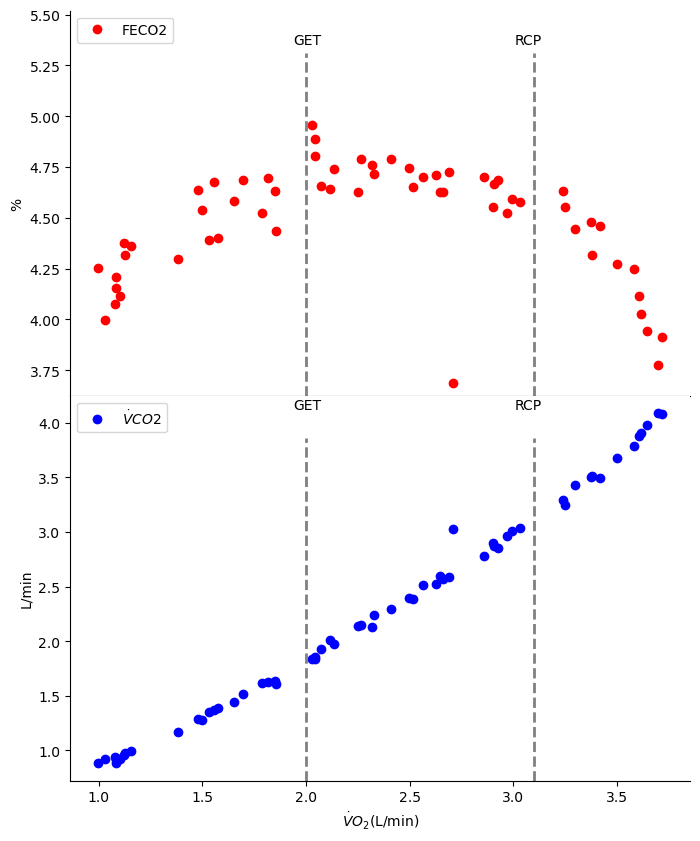

In [44]:
# read
df = pd.read_csv('../input/demo-knes381/subject_1432.csv', header=[0], skiprows=[1,2,3])

# rename column headers
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

# labelling our relavant values to be easier to type
x = df['VO2']
y = df['FECO2']
y1 = df['VCO2']


fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 10)) # Two figures

# this line seperates the two plots
fig.subplots_adjust(hspace=0)


# plotting FECO2 on top
ax[0].plot(x, y, 'o', label=('FECO2'), c='r' )

# in the line of code below I hide the top and right black bars serrounding the plot for APA format.
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set(ylabel=('%'))
ax[0].legend()
ax[0].legend(loc="upper left")

# change height of figure
ymin, ymax = ax[0].get_ylim()
ax[0].set_ylim(ymin,ymax *1.1)

# metabolic lines

GET = 2.0
RCP = 3.1
y_limits = ax[0].get_ylim()
GETln = y_limits[1]
RCPln = y_limits[1]
ax[0].axvline( x=GET,color='gray', linestyle = '--', linewidth=2, ymin=0.0, ymax=0.89,)
ax[0].axvline( x=RCP,color='gray', linestyle = '--', linewidth=2, ymin=0.0, ymax=0.89)
ax[0].text(2.0*.97, GETln*.97, 'GET', color = 'black')
ax[0].text(3.1*.97, RCPln*.97, 'RCP', color = 'black')



# Second plot of values down from the top
ax[1].plot(x, y1, 'o', label=('$\dot VCO2$'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('L/min'))
ax[1].set(xlabel=('$\dot VO_2$(L/min)'))
ax[1].legend()
ax[1].legend(loc="upper left")

y_limits = ax[1].get_ylim()
GETln1 = y_limits[1]
RCPln1 = y_limits[1]
ax[1].axvline( x=GET,color='gray', linestyle = '--', linewidth=2, ymin=0.0, ymax=0.89,)
ax[1].axvline( x=RCP,color='gray', linestyle = '--', linewidth=2, ymin=0.0, ymax=0.89)
ax[1].text(2.0*.97, GETln1*.97, 'GET', color = 'black')
ax[1].text(3.1*.97, RCPln1*.97, 'RCP', color = 'black')

# save the figure before we show it... or it will be blank
fig.savefig("feco2-vco2-5.png", dpi=300, bbox_inches = "tight")
fig.show()